In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt
import hvplot.pandas

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc,
    # plot_confusion_matrix, plot_roc_curve
)
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

# from xgboost import XGBClassifier
# from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

# pd.set_option('display.float', '{:.2f}'.format)
# pd.set_option('display.max_columns', 50)
# pd.set_option('display.max_rows', 50)

In [2]:
loan_df = pd.read_csv("C:/Users/enmwa/OneDrive/Desktop/group4/lending_club_data2_.csv")
loan_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16,0,36369.0,41.8,25,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17,0,20131.0,53.3,27,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13,0,11987.0,92.2,26,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6,0,5472.0,21.5,13,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13,0,24584.0,69.8,43,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [3]:
loan_df.info

<bound method DataFrame.info of         loan_amnt        term  int_rate  installment grade sub_grade  \
0           10000   36 months     11.44       329.48     B        B4   
1            8000   36 months     11.99       265.68     B        B5   
2           15600   36 months     10.49       506.97     B        B3   
3            7200   36 months      6.49       220.65     A        A2   
4           24375   60 months     17.27       609.33     C        C5   
...           ...         ...       ...          ...   ...       ...   
396025      10000   60 months     10.99       217.38     B        B4   
396026      21000   36 months     12.29       700.42     C        C1   
396027       5000   36 months      9.99       161.32     B        B1   
396028      21000   60 months     15.31       503.02     C        C2   
396029       2000   36 months     13.61        67.98     C        C2   

                       emp_title emp_length home_ownership  annual_inc  ...  \
0                      M

In [4]:
loan_df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960290e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584453e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059186e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [5]:
#EXPLORATORY DATA ANALYSIS



In [6]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  int64  
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [7]:
#current status of the loan
loan_df['loan_status'].value_counts().hvplot.bar(
    title="Loan Status Counts", xlabel='Loan Status', ylabel='Count', 
    width=500, height=350
)

:Bars   [loan_status]   (count)

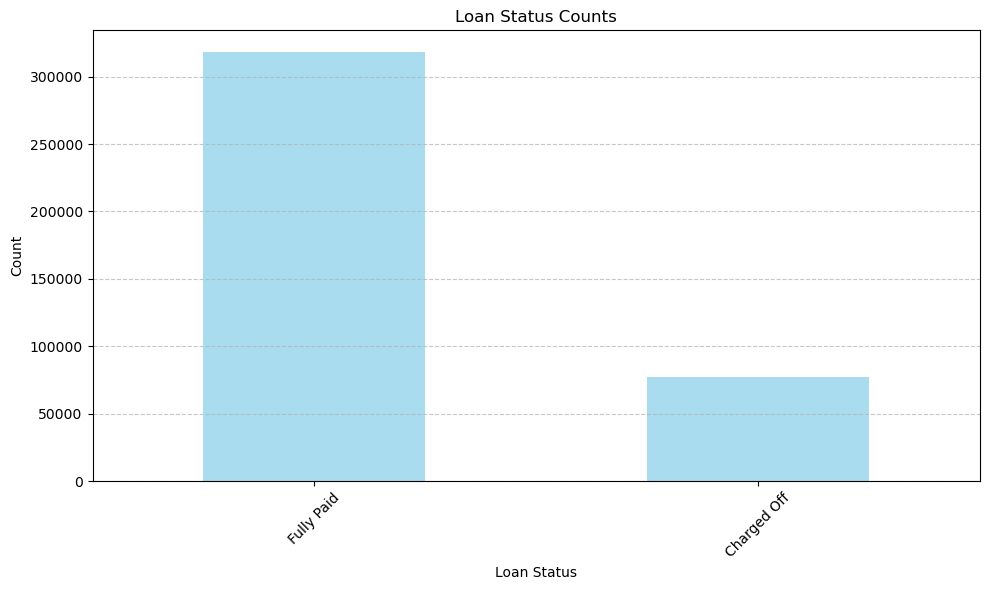

In [8]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Load your data into a DataFrame (replace 'path_to_your_file.csv' with your actual file path)
# loan_df = pd.read_csv('C:/Users/enmwa/OneDrive/Desktop/group4/lending_club_data2_.csv')

# Calculate the value counts of loan_status
loan_status_counts = loan_df['loan_status'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
loan_status_counts.plot(kind='bar', color='skyblue', alpha=0.7)

# Customize the plot
plt.title("Loan Status Counts")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [9]:
#correlation analysis
# List of non-numeric columns
non_numeric_columns = loan_df.select_dtypes(exclude=['float64', 'int64']).columns
print("Non-numeric columns:", non_numeric_columns)

# Function to convert columns to numeric where possible
def convert_to_numeric(df, column_name, pattern=r'(\d+)'):
    if column_name in df.columns:
        df[column_name] = df[column_name].astype(str).str.extract(pattern).astype(float)

# Convert 'term' column to numeric
convert_to_numeric(loan_df, 'term')

# Convert 'emp_length' column to numeric
convert_to_numeric(loan_df, 'emp_length')

# Handle other specific columns as needed
# For example, if 'grade' is alphanumeric but has numeric components, handle it similarly

# Select only numeric columns for correlation heatmap
numeric_df = loan_df.select_dtypes(include=['float64', 'int64'])
# # Identify non-numeric columns
# non_numeric_columns = loan_df.select_dtypes(exclude=['float64', 'int64']).columns
# print("Non-numeric columns:", non_numeric_columns)
# if 'term' in loan_df.columns:
#     loan_df['term'] = loan_df['term'].astype(str).str.extract('(\d+)').astype(float)

# #Function to convert columns to numeric where possible
# def convert_to_numeric(df, column_name, pattern=r'(\d+)'):
#     if column_name in df.columns:
#         df[column_name] = df[column_name].astype(str).str.extract(pattern).astype(float)

# # Convert 'emp_length' column to numeric
# if 'emp_length' in loan_df.columns:
#     loan_df['emp_length'] = loan_df['emp_length'].astype(str).str.extract('(\d+)').astype(float)


Non-numeric columns: Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')


In [10]:
# Drop non-numeric columns
numeric_df = loan_df.drop(columns=non_numeric_columns)

In [11]:
# Select only numeric columns
numeric_df = loan_df.select_dtypes(include=['float64', 'int64'])

numeric_df

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,10000,36.0,11.44,329.48,10.0,117000.0,26.24,16,0,36369.0,41.8,25,0.0,0.0
1,8000,36.0,11.99,265.68,4.0,65000.0,22.05,17,0,20131.0,53.3,27,3.0,0.0
2,15600,36.0,10.49,506.97,1.0,43057.0,12.79,13,0,11987.0,92.2,26,0.0,0.0
3,7200,36.0,6.49,220.65,6.0,54000.0,2.60,6,0,5472.0,21.5,13,0.0,0.0
4,24375,60.0,17.27,609.33,9.0,55000.0,33.95,13,0,24584.0,69.8,43,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000,60.0,10.99,217.38,2.0,40000.0,15.63,6,0,1990.0,34.3,23,0.0,0.0
396026,21000,36.0,12.29,700.42,5.0,110000.0,21.45,6,0,43263.0,95.7,8,1.0,0.0
396027,5000,36.0,9.99,161.32,10.0,56500.0,17.56,15,0,32704.0,66.9,23,0.0,0.0
396028,21000,60.0,15.31,503.02,10.0,64000.0,15.88,9,0,15704.0,53.8,20,5.0,0.0


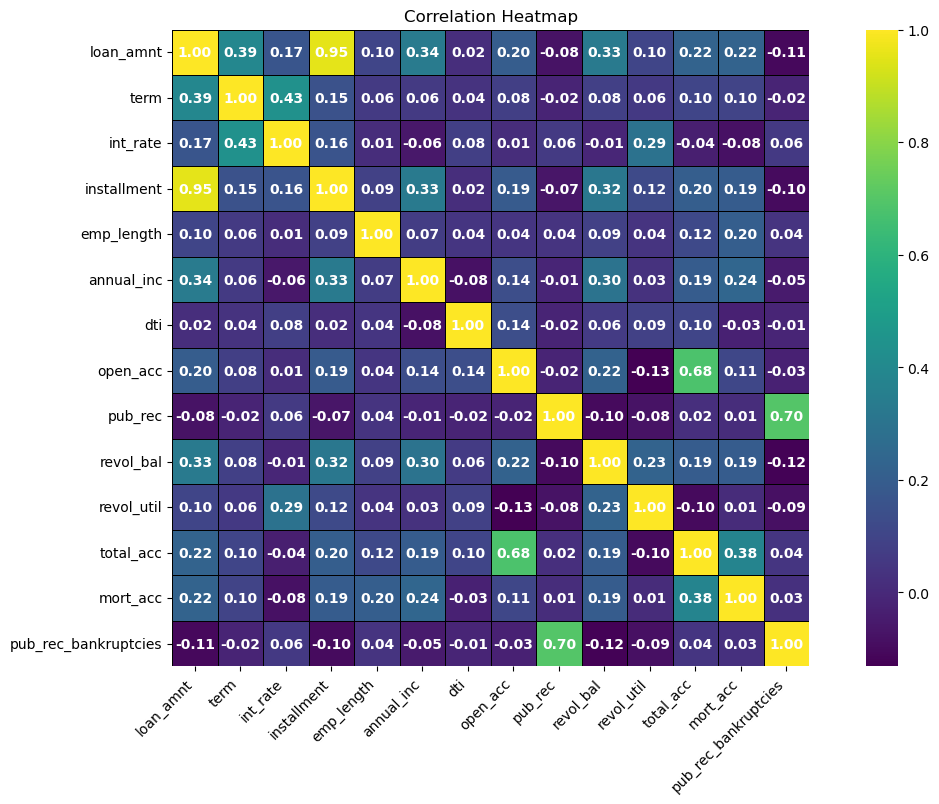

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure that only numeric data is passed to the corr() function
numeric_df = loan_df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(corr_matrix, annot=False, cmap='viridis', cbar=True, square=True, linewidths=0.5, linecolor='black')

# Manually add the annotations using text annotations
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{corr_matrix.iloc[i, j]:.2f}",
                 ha='center', va='center', color='white', fontsize=10, weight='bold')

# Rotate the tick labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Adjust the layout to prevent clipping of tick-labels
plt.tight_layout()

# Add a title
plt.title('Correlation Heatmap')
plt.show()


In [13]:
installment = loan_df.hvplot.hist(
    y='installment', by='loan_status', subplots=False, 
    width=350, height=400, bins=50, alpha=0.4,
    title="Installment by Loan Status", 
    xlabel='Installment', ylabel='Counts', legend='top'
)

loan_amnt = loan_df.hvplot.hist(
    y='loan_amnt', by='loan_status', subplots=False, 
    width=350, height=400, bins=30, alpha=0.7, 
    title="Loan Amount by Loan Status", 
    xlabel='Loan Amount', ylabel='Counts', legend='top'
)

installment + loan_amnt


:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [installment]   (installment_count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [loan_amnt]   (loan_amnt_count)

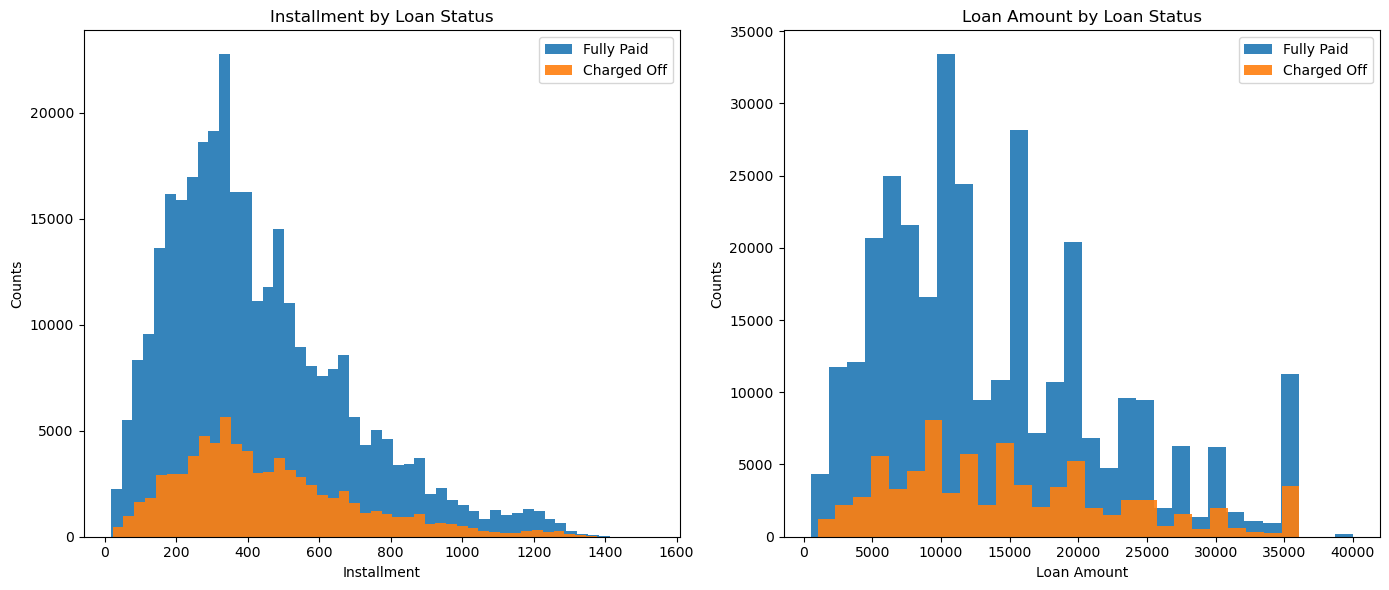

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a DataFrame (replace 'path_to_your_file.csv' with your actual file path)
loan_df = pd.read_csv('C:/Users/enmwa/OneDrive/Desktop/group4/lending_club_data2_.csv')

# Define a function to create histograms
def plot_histogram(df, column, by, bins, alpha, title, xlabel, ylabel, ax):
    unique_statuses = df[by].unique()
    for status in unique_statuses:
        subset = df[df[by] == status]
        ax.hist(subset[column], bins=bins, alpha=alpha, label=str(status))
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(loc='upper right')

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot the 'installment' histogram
plot_histogram(
    df=loan_df,
    column='installment',
    by='loan_status',
    bins=50,
    alpha=0.9,
    title="Installment by Loan Status",
    xlabel='Installment',
    ylabel='Counts',
    ax=axes[0]
)

# Plot the 'loan_amnt' histogram
plot_histogram(
    df=loan_df,
    column='loan_amnt',
    by='loan_status',
    bins=30,
    alpha=0.9,
    title="Loan Amount by Loan Status",
    xlabel='Loan Amount',
    ylabel='Counts',
    ax=axes[1]
)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [15]:
# grade & sub_grade¶
# grade: LC assigned loan grade
# sub_grade: LC assigned loan subgrade
# Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans.

loan_df = pd.read_csv("C:/Users/enmwa/OneDrive/Desktop/group4/lending_club_data2_.csv")
print(f"GRADE unique: {loan_df.grade.unique()}")
print(f"SUB_GRADE unique: {loan_df.sub_grade.unique()}")

GRADE unique: ['B' 'A' 'C' 'E' 'D' 'F' 'G']
SUB_GRADE unique: ['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']


In [16]:
 fully_paid = loan_df.loc[loan_df['loan_status']=='Fully Paid', 'grade'].value_counts().hvplot.bar() 
charged_off = loan_df.loc[loan_df['loan_status']=='Charged Off', 'grade'].value_counts().hvplot.bar() 

grades = (fully_paid * charged_off).opts(
    title="Loan Status by Grade", xlabel='Grades', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right'
)

fully_paid = loan_df.loc[loan_df['loan_status']=='Fully Paid', 'sub_grade'].value_counts().hvplot.bar() 
charged_off = loan_df.loc[loan_df['loan_status']=='Charged Off', 'sub_grade'].value_counts().hvplot.bar() 

sub_grades = (fully_paid * charged_off).opts(
    title="Loan Status by Grade", xlabel='Grades', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right', 
    shared_axes=False
)

grades + sub_grades

:Layout
   .Overlay.Count.I  :Overlay
      .Bars.Count.I  :Bars   [grade]   (count)
      .Bars.Count.II :Bars   [grade]   (count)
   .Overlay.Count.II :Overlay
      .Bars.Count.I  :Bars   [sub_grade]   (count)
      .Bars.Count.II :Bars   [sub_grade]   (count)

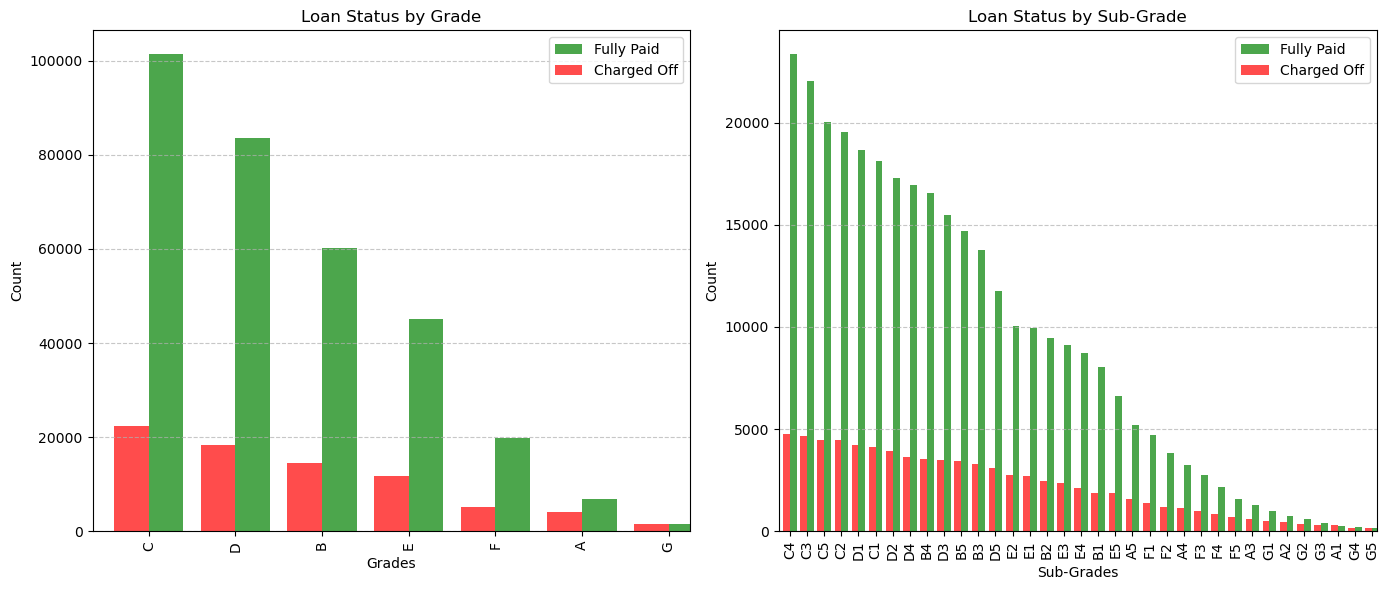

In [17]:

# Filter the DataFrame for 'Fully Paid' and 'Charged Off' loan statuses
fully_paid_grades = loan_df.loc[loan_df['loan_status'] == 'Fully Paid', 'grade'].value_counts()
charged_off_grades = loan_df.loc[loan_df['loan_status'] == 'Charged Off', 'grade'].value_counts()

# Create a bar chart for grades
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Fully Paid grades
fully_paid_grades.plot(kind='bar', alpha=0.7, color='green', ax=ax[0], position=0, width=0.4, label='Fully Paid')
# Charged Off grades
charged_off_grades.plot(kind='bar', alpha=0.7, color='red', ax=ax[0], position=1, width=0.4, label='Charged Off')

# Customize the plot
ax[0].set_title("Loan Status by Grade")
ax[0].set_xlabel("Grades")
ax[0].set_ylabel("Count")
ax[0].legend(loc='upper right')
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# Filter the DataFrame for 'Fully Paid' and 'Charged Off' sub_grades
fully_paid_sub_grades = loan_df.loc[loan_df['loan_status'] == 'Fully Paid', 'sub_grade'].value_counts()
charged_off_sub_grades = loan_df.loc[loan_df['loan_status'] == 'Charged Off', 'sub_grade'].value_counts()

# Fully Paid sub_grades
fully_paid_sub_grades.plot(kind='bar', alpha=0.7, color='green', ax=ax[1], position=0, width=0.4, label='Fully Paid')
# Charged Off sub_grades
charged_off_sub_grades.plot(kind='bar', alpha=0.7, color='red', ax=ax[1], position=1, width=0.4, label='Charged Off')

# Customize the plot
ax[1].set_title("Loan Status by Sub-Grade")
ax[1].set_xlabel("Sub-Grades")
ax[1].set_ylabel("Count")
ax[1].legend(loc='upper right')
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [18]:
fully_paid = loan_df.loc[loan_df['loan_status']=='Fully Paid', 'grade'].value_counts().hvplot.bar() 
charged_off = loan_df.loc[loan_df['loan_status']=='Charged Off', 'grade'].value_counts().hvplot.bar() 

(fully_paid * charged_off).opts(
    title="Loan Status by Grade", xlabel='Grades', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right', xrotation=90
)

:Overlay
   .Bars.Count.I  :Bars   [grade]   (count)
   .Bars.Count.II :Bars   [grade]   (count)

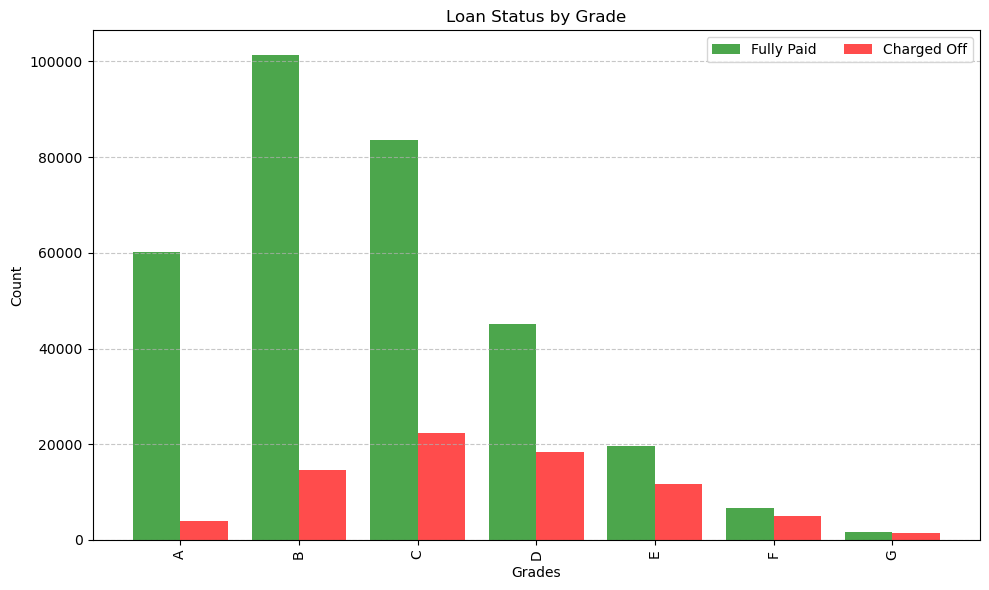

In [19]:

import numpy as np

# Load your data into a DataFrame (replace 'path_to_your_file.csv' with your actual file path)
loan_df = pd.read_csv('C:/Users/enmwa/OneDrive/Desktop/group4/lending_club_data2_.csv')

# Filter the DataFrame for 'Fully Paid' and 'Charged Off' loan statuses
fully_paid_grades = loan_df.loc[loan_df['loan_status'] == 'Fully Paid', 'grade'].value_counts()
charged_off_grades = loan_df.loc[loan_df['loan_status'] == 'Charged Off', 'grade'].value_counts()

# Create a DataFrame with both counts
grades_df = pd.DataFrame({
    'Fully Paid': fully_paid_grades,
    'Charged Off': charged_off_grades
}).fillna(0)  # Fill NaN values with 0

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Create bar positions
bar_width = 0.4
index = np.arange(len(grades_df))

# Bar plots
bar1 = ax.bar(index - bar_width / 2, grades_df['Fully Paid'], bar_width, label='Fully Paid', color='green', alpha=0.7)
bar2 = ax.bar(index + bar_width / 2, grades_df['Charged Off'], bar_width, label='Charged Off', color='red', alpha=0.7)

# Customize the plot
ax.set_title("Loan Status by Grade")
ax.set_xlabel("Grades")
ax.set_ylabel("Count")
ax.set_xticks(index)
ax.set_xticklabels(grades_df.index, rotation=90)
ax.legend(loc='upper right', ncol=2)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()



In [20]:
#It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.

In [21]:
loan_df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

C:\Users\enmwa\AppData\Local\Temp\ipykernel_13128\2905633881.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(overall_home_ownership.index, rotation=90)


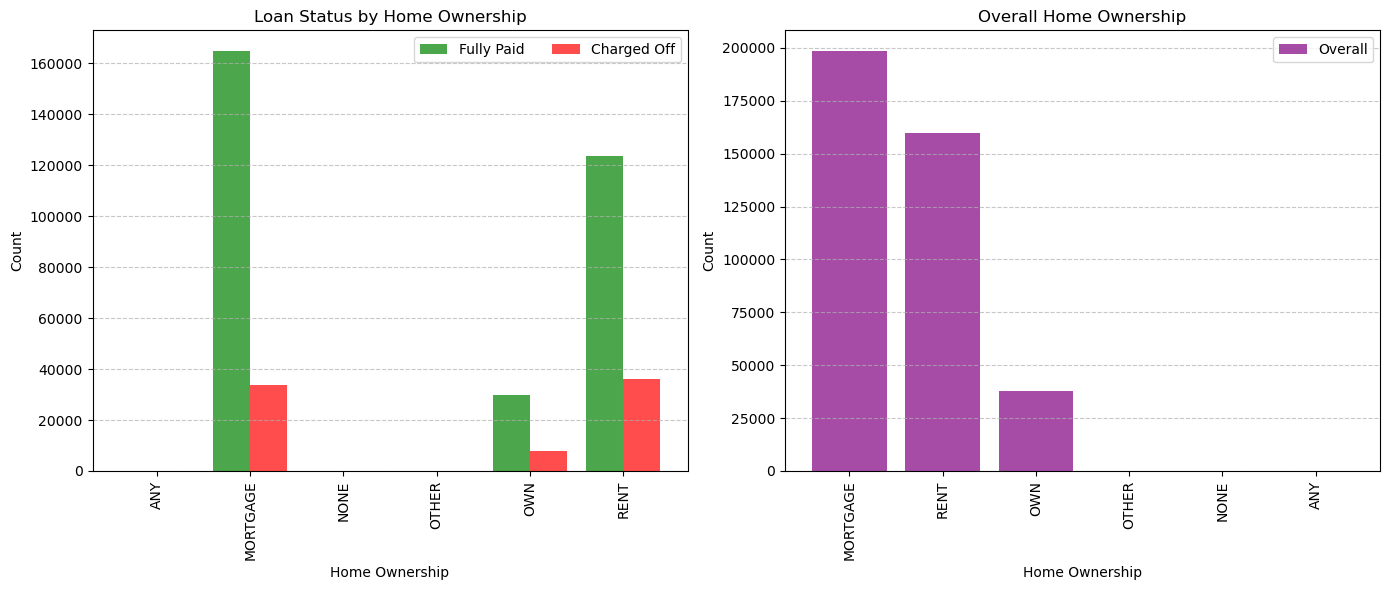

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your data into a DataFrame (replace 'path_to_your_file.csv' with your actual file path)
loan_df = pd.read_csv('C:/Users/enmwa/OneDrive/Desktop/group4/lending_club_data2_.csv')

# Filter the DataFrame for 'Fully Paid' and 'Charged Off' loan statuses for home ownership
fully_paid_home_ownership = loan_df.loc[loan_df['loan_status'] == 'Fully Paid', 'home_ownership'].value_counts()
charged_off_home_ownership = loan_df.loc[loan_df['loan_status'] == 'Charged Off', 'home_ownership'].value_counts()

# Create a DataFrame with both counts
home_ownership_df = pd.DataFrame({
    'Fully Paid': fully_paid_home_ownership,
    'Charged Off': charged_off_home_ownership
}).fillna(0)  # Fill NaN values with 0

# Overall home ownership counts
overall_home_ownership = loan_df['home_ownership'].value_counts()

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Loan Status by Home Ownership
bar_width = 0.4
index = np.arange(len(home_ownership_df))

# Bar plots for home ownership by loan status
axes[0].bar(index - bar_width / 2, home_ownership_df['Fully Paid'], bar_width, label='Fully Paid', color='green', alpha=0.7)
axes[0].bar(index + bar_width / 2, home_ownership_df['Charged Off'], bar_width, label='Charged Off', color='red', alpha=0.7)

# Customize the plot
axes[0].set_title("Loan Status by Home Ownership")
axes[0].set_xlabel("Home Ownership")
axes[0].set_ylabel("Count")
axes[0].set_xticks(index)
axes[0].set_xticklabels(home_ownership_df.index, rotation=90)
axes[0].legend(loc='upper right', ncol=2)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot Overall Home Ownership
axes[1].bar(overall_home_ownership.index, overall_home_ownership.values, color='purple', alpha=0.7)

# Customize the plot
axes[1].set_title("Overall Home Ownership")
axes[1].set_xlabel("Home Ownership")
axes[1].set_ylabel("Count")
axes[1].set_xticklabels(overall_home_ownership.index, rotation=90)
axes[1].legend(['Overall'], loc='upper right')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [23]:
loan_df.loc[(loan_df.home_ownership == 'ANY') | (loan_df.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'  
loan_df.home_ownership.value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: count, dtype: int64

In [24]:
loan_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [25]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Load your data into a DataFrame (replace 'path_to_your_file.csv' with your actual file path)
# loan_df = pd.read_csv('C:/Users/enmwa/OneDrive/Desktop/group4/lending_club_data2_.csv')# Create a figure with specified size

# #print(loan_df.columns)

# if 'term' in loan_df.columns:
#     term_col = 'term'
# else:
#     term_col = 'Term'  


In [26]:
print(loan_df.columns)

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
loan_df = pd.read_csv('C:/Users/enmwa/OneDrive/Desktop/group4/lending_club_data2_.csv')

# Strip any leading/trailing spaces from column names
loan_df.columns = loan_df.columns.str.strip()



Unique values in 'term' column after stripping spaces:
['36 months' '60 months']
Missing values in 'term' column:
0
        term
0  36 months
1  36 months
2  36 months
3  36 months
4  60 months


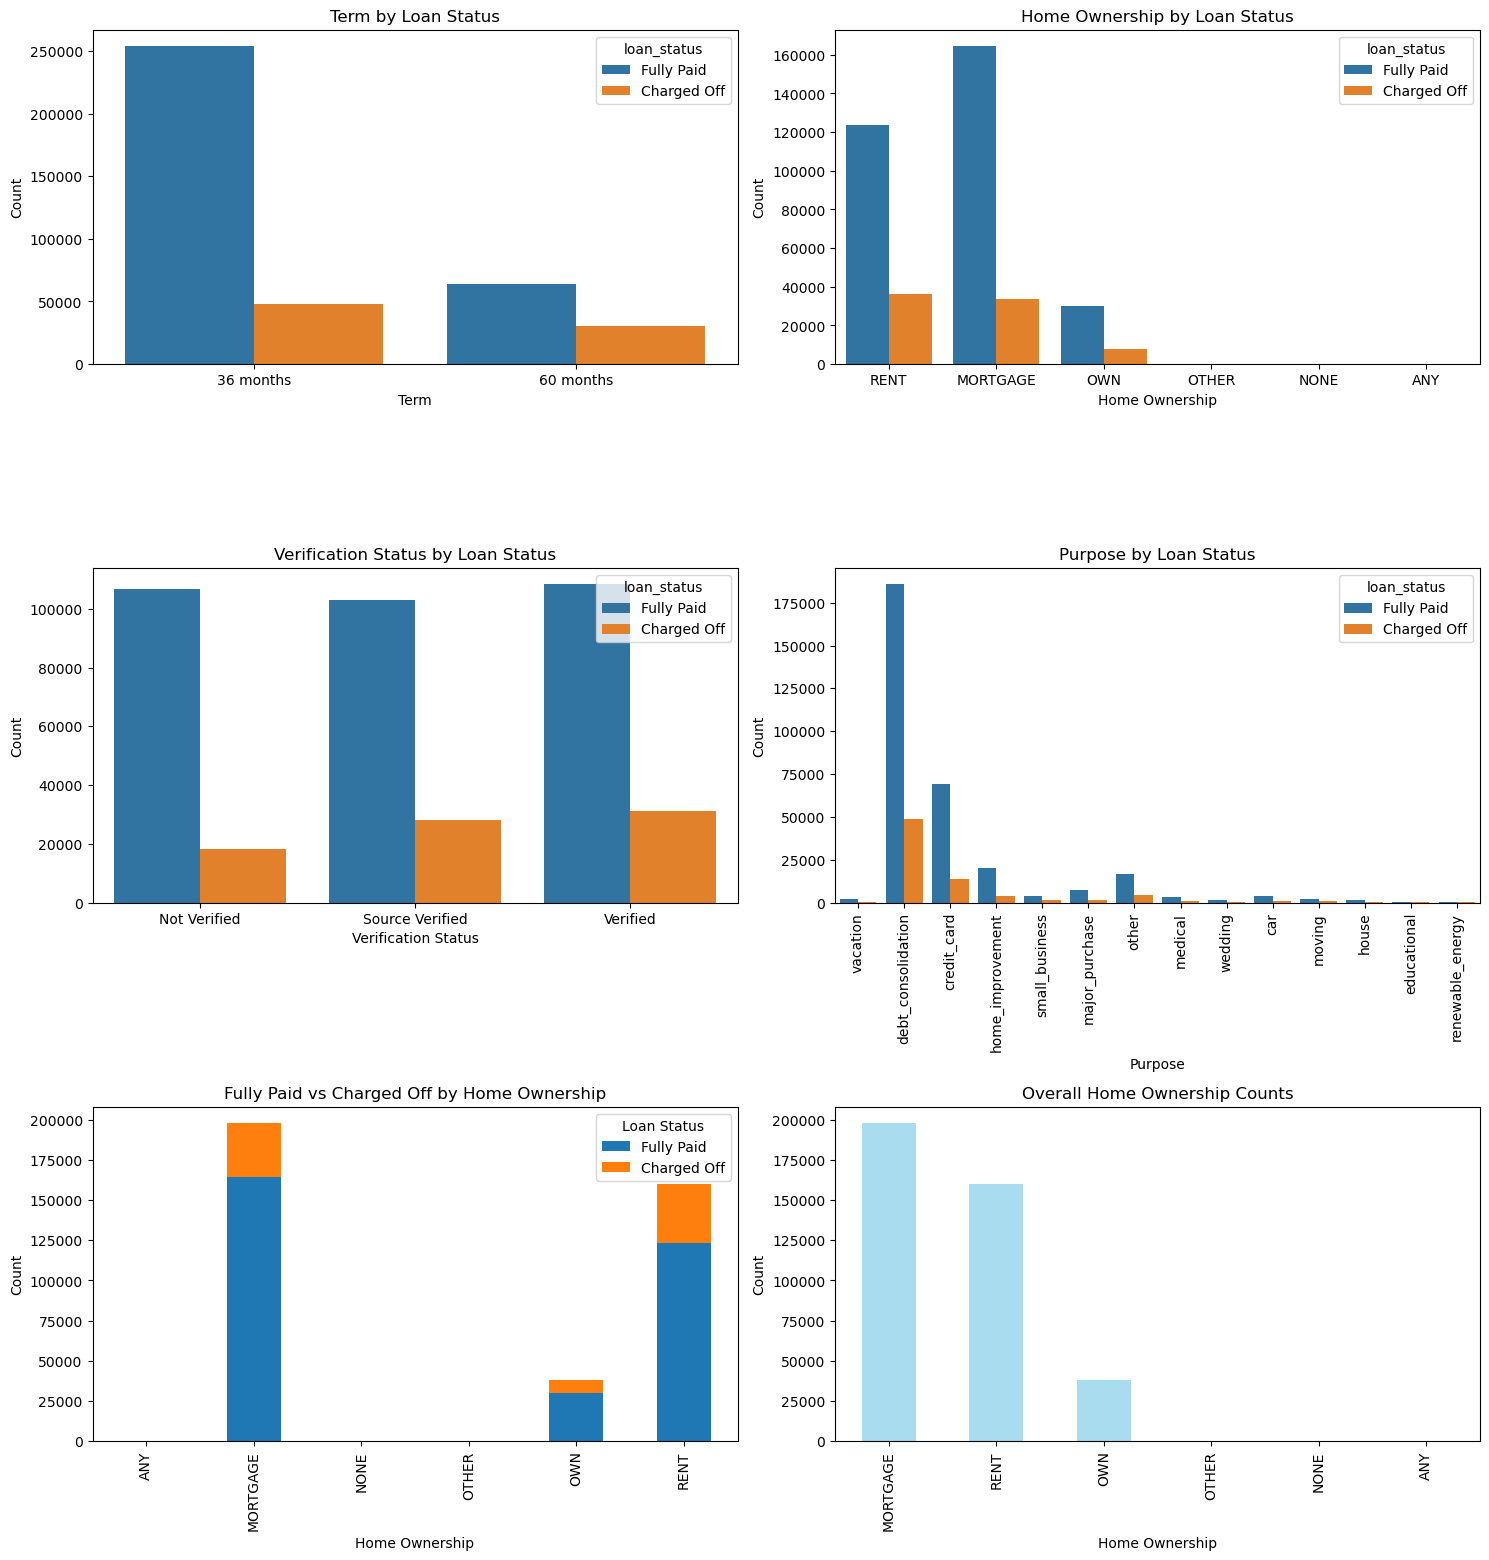

In [28]:
# Strip any leading/trailing spaces from relevant columns
loan_df['term'] = loan_df['term'].str.strip()
loan_df['loan_status'] = loan_df['loan_status'].str.strip()
loan_df['home_ownership'] = loan_df['home_ownership'].str.strip()

# Check for unique values and missing values in 'term' column
print("Unique values in 'term' column after stripping spaces:")
print(loan_df['term'].unique())
print("Missing values in 'term' column:")
print(loan_df['term'].isnull().sum())

# Check the first few rows to understand the 'term' column data
print(loan_df[['term']].head())

# Create a figure with specified size
plt.figure(figsize=(15, 20))

# Subplot 1: Term by Loan Status
plt.subplot(4, 2, 1)
sns.countplot(x='term', data=loan_df, hue='loan_status')
plt.title('Term by Loan Status')
plt.xlabel('Term')
plt.ylabel('Count')

# Subplot 2: Home Ownership by Loan Status
plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=loan_df, hue='loan_status')
plt.title('Home Ownership by Loan Status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')

# Subplot 3: Verification Status by Loan Status
plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=loan_df, hue='loan_status')
plt.title('Verification Status by Loan Status')
plt.xlabel('Verification Status')
plt.ylabel('Count')

# Subplot 4: Purpose by Loan Status
plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=loan_df, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Purpose by Loan Status')
plt.xlabel('Purpose')
plt.ylabel('Count')

# Subplot 5: Fully Paid vs Charged Off by Home Ownership
plt.subplot(4, 2, 5)
fully_paid_home_ownership = loan_df.loc[loan_df['loan_status'] == 'Fully Paid', 'home_ownership'].value_counts()
charged_off_home_ownership = loan_df.loc[loan_df['loan_status'] == 'Charged Off', 'home_ownership'].value_counts()
home_ownership_df = pd.DataFrame({
    'Fully Paid': fully_paid_home_ownership,
    'Charged Off': charged_off_home_ownership
}).fillna(0)  # Fill NaN values with 0
home_ownership_df.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Fully Paid vs Charged Off by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.legend(title='Loan Status')

# Subplot 6: Overall Home Ownership Counts
plt.subplot(4, 2, 6)
overall_home_ownership = loan_df['home_ownership'].value_counts()
overall_home_ownership.plot(kind='bar', color='skyblue', alpha=0.7, ax=plt.gca())
plt.title('Overall Home Ownership Counts')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()


In [29]:
loan_df.loc[loan_df['home_ownership']=='OTHER', 'loan_status'].value_counts()

loan_status
Fully Paid     96
Charged Off    16
Name: count, dtype: int64

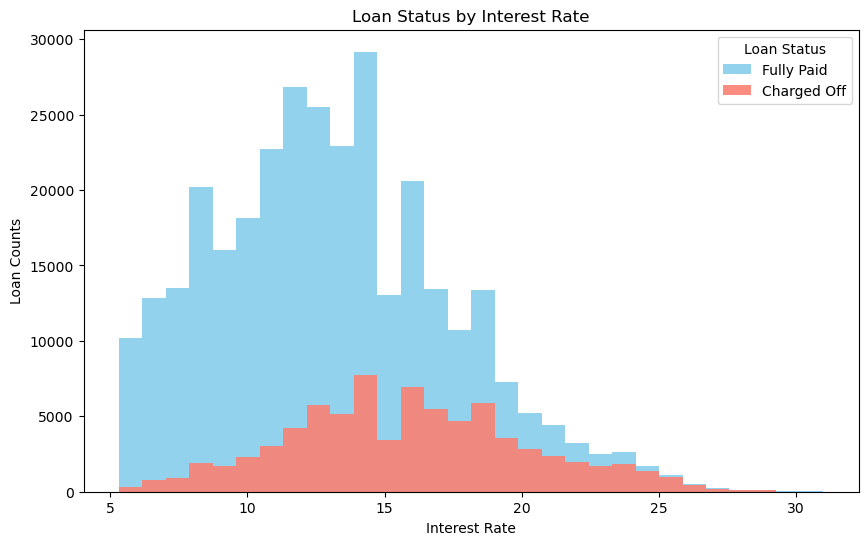

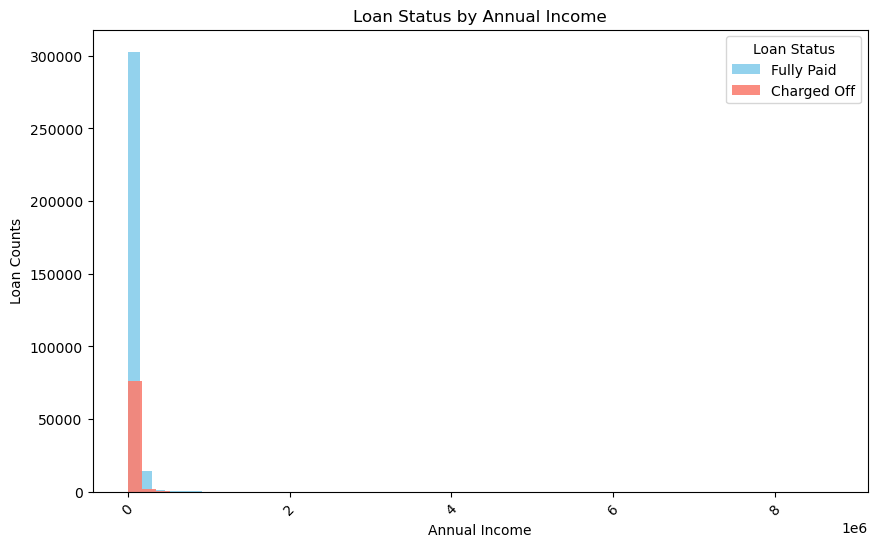

In [30]:
# Strip any leading/trailing spaces from column names
loan_df.columns = loan_df.columns.str.strip()

# Strip any leading/trailing spaces from relevant columns
loan_df['loan_status'] = loan_df['loan_status'].str.strip()

# Define colors for each loan status
colors = {'Fully Paid': 'skyblue', 'Charged Off': 'salmon'}

# Plotting interest rate by loan status
plt.figure(figsize=(10, 6))
for status in loan_df['loan_status'].unique():
    subset = loan_df[loan_df['loan_status'] == status]
    plt.hist(subset['int_rate'].dropna(), bins=30, alpha=0.9, label=status, color=colors[status])
plt.title('Loan Status by Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Loan Counts')
plt.legend(title='Loan Status', loc='upper right')
plt.show()

# Plotting annual income by loan status
plt.figure(figsize=(10, 6))
for status in loan_df['loan_status'].unique():
    subset = loan_df[loan_df['loan_status'] == status]
    plt.hist(subset['annual_inc'].dropna(), bins=50, alpha=0.9, label=status, color=colors[status])
plt.title('Loan Status by Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Loan Counts')
plt.xticks(rotation=45)
plt.legend(title='Loan Status', loc='upper right')
plt.show()


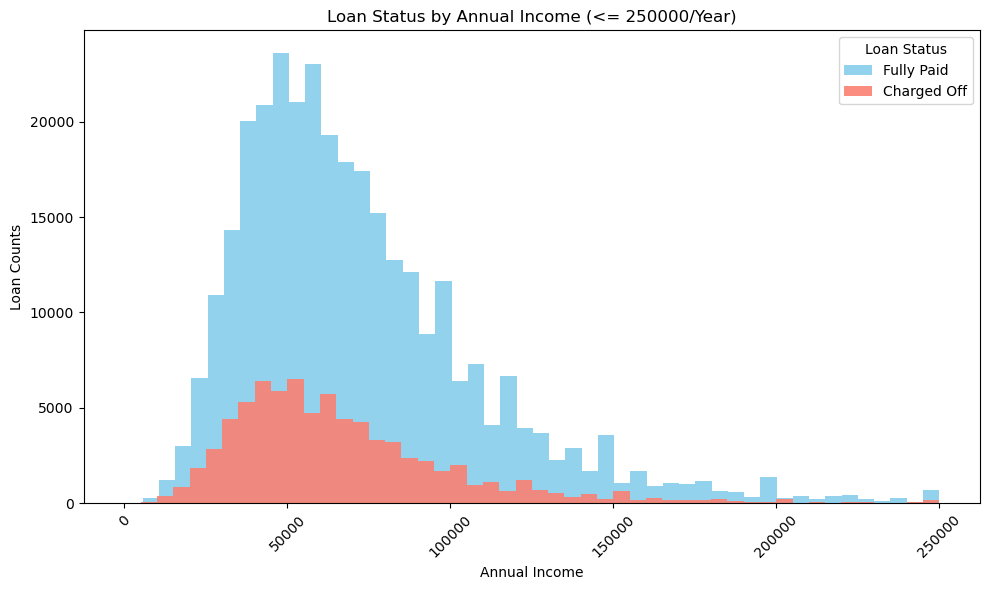

In [31]:
# Filter data for annual income <= 250000
filtered_data = loan_df[loan_df['annual_inc'] <= 250000]

# Define colors for each loan status
colors = {'Fully Paid': 'skyblue', 'Charged Off': 'salmon'}

# Plotting annual income by loan status
plt.figure(figsize=(10, 6))
for status in filtered_data['loan_status'].unique():
    subset = filtered_data[filtered_data['loan_status'] == status]
    plt.hist(subset['annual_inc'].dropna(), bins=50, alpha=0.9, label=status, color=colors[status])
    
plt.title('Loan Status by Annual Income (<= 250000/Year)')
plt.xlabel('Annual Income')
plt.ylabel('Loan Counts')
plt.xticks(rotation=45)
plt.legend(title='Loan Status', loc='upper right')
plt.tight_layout()
plt.show()


In [32]:
# It seems that loans with high intersest rate are more likely to be unpaid.


In [33]:
print((loan_df[loan_df.annual_inc >= 100000].shape[0] / loan_df.shape[0]) * 100)
print((loan_df[loan_df.annual_inc >= 1000000].shape[0] / loan_df.shape[0]) * 100)

19.155619523773453
0.018937959245511705


In [34]:
loan_df.loc[loan_df.annual_inc >= 1000000, 'loan_status'].value_counts()

loan_status
Fully Paid     65
Charged Off    10
Name: count, dtype: int64

In [35]:
loan_df.loc[loan_df.annual_inc >= 100000, 'loan_status'].value_counts()

loan_status
Fully Paid     64603
Charged Off    11259
Name: count, dtype: int64

In [36]:
#THE HIGHER THE INCOME, THE LESS THE DEFAULTS

In [37]:
print(loan_df.emp_title.isna().sum())
print(loan_df.emp_title.nunique())

22927
173103


In [38]:
loan_df['emp_title'].value_counts()[:30]

emp_title
Teacher                     4389
Manager                     4250
Registered Nurse            1856
RN                          1846
Supervisor                  1830
Sales                       1638
Project Manager             1505
Owner                       1410
Driver                      1339
Office Manager              1218
manager                     1145
Director                    1089
General Manager             1074
Engineer                     995
teacher                      962
driver                       882
Vice President               857
Operations Manager           763
Administrative Assistant     756
Accountant                   748
President                    742
owner                        697
Account Manager              692
Police Officer               686
supervisor                   673
Attorney                     667
Sales Manager                665
sales                        645
Executive Assistant          642
Analyst                      623


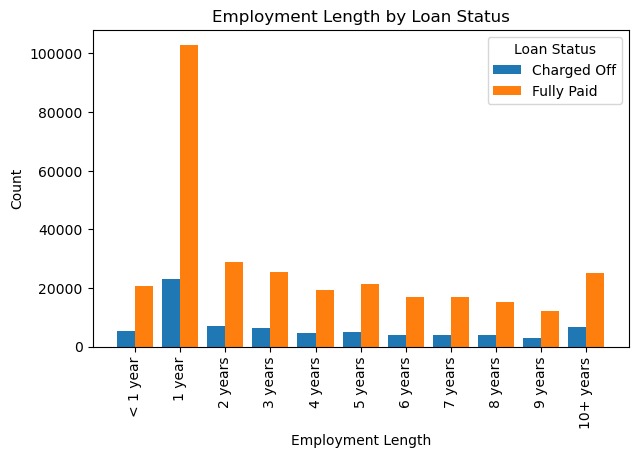

In [39]:
# Define the order for 'emp_length'
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
         '6 years', '7 years', '8 years', '9 years', '10+ years']

# Create a figure
plt.figure(figsize=(12, 8))

# Create a subplot for Employment Length by Loan Status
plt.subplot(2, 2, 1)

# Count occurrences for each combination of 'emp_length' and 'loan_status'
count_loan_df= loan_df.groupby(['emp_length', 'loan_status']).size().unstack(fill_value=0)

# Plot bars for each 'loan_status' category
bar_width = 0.4
index = range(len(order))

for i, status in enumerate(count_loan_df.columns):
    plt.bar(
        [x + i * bar_width for x in index],
        count_loan_df[status],
        width=bar_width,
        label=status
    )

# Set labels and title
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.title('Employment Length by Loan Status')
plt.xticks([x + bar_width * (len(count_loan_df.columns) - 1) / 2 for x in index], order, rotation=90)
plt.legend(title='Loan Status')

# Adjust layout
plt.tight_layout()
plt.show()


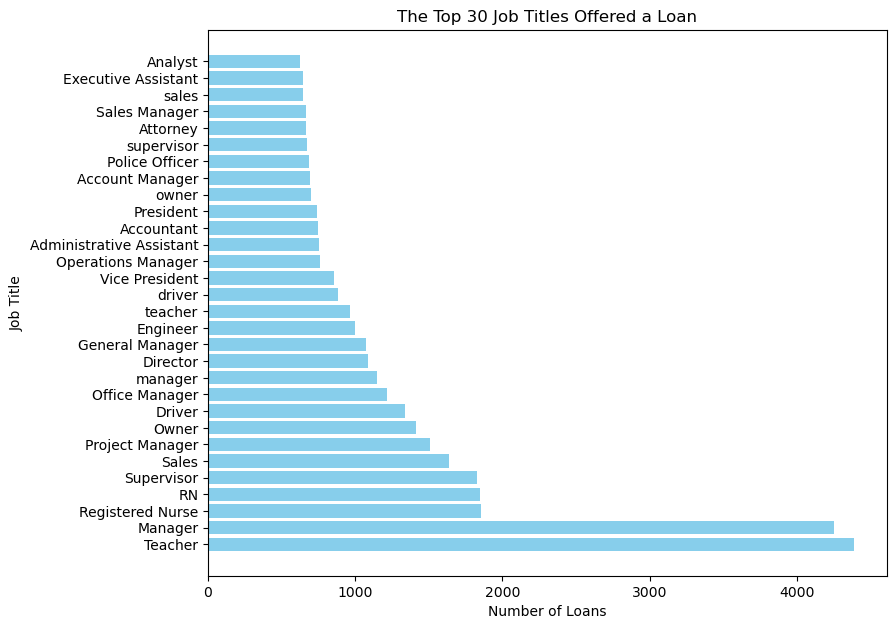

In [40]:
# # Create a figure with a larger size
plt.figure(figsize=(16, 12))  # Increase the size as needed

# Subplot 2: Top 30 Job Titles
plt.subplot(2, 2, 2)
top_30_jobs = loan_df['emp_title'].value_counts().head(30)
plt.barh(top_30_jobs.index, top_30_jobs.values, color='skyblue')

# Set labels and title
plt.title("The Top 30 Job Titles Offered a Loan")
plt.xlabel('Number of Loans')
plt.ylabel('Job Title')

# Adjust layout to make sure everything fits
plt.tight_layout()
plt.show()


In [41]:
loan_df.title.isna().sum()

1756

In [42]:
loan_df.title.value_counts()[:10]

title
Debt consolidation         152472
Credit card refinancing     51487
Home improvement            15264
Other                       12930
Debt Consolidation          11608
Major purchase               4769
Consolidation                3852
debt consolidation           3547
Business                     2949
Debt Consolidation Loan      2864
Name: count, dtype: int64

In [43]:
loan_df.purpose.value_counts()[:10]

purpose
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
Name: count, dtype: int64

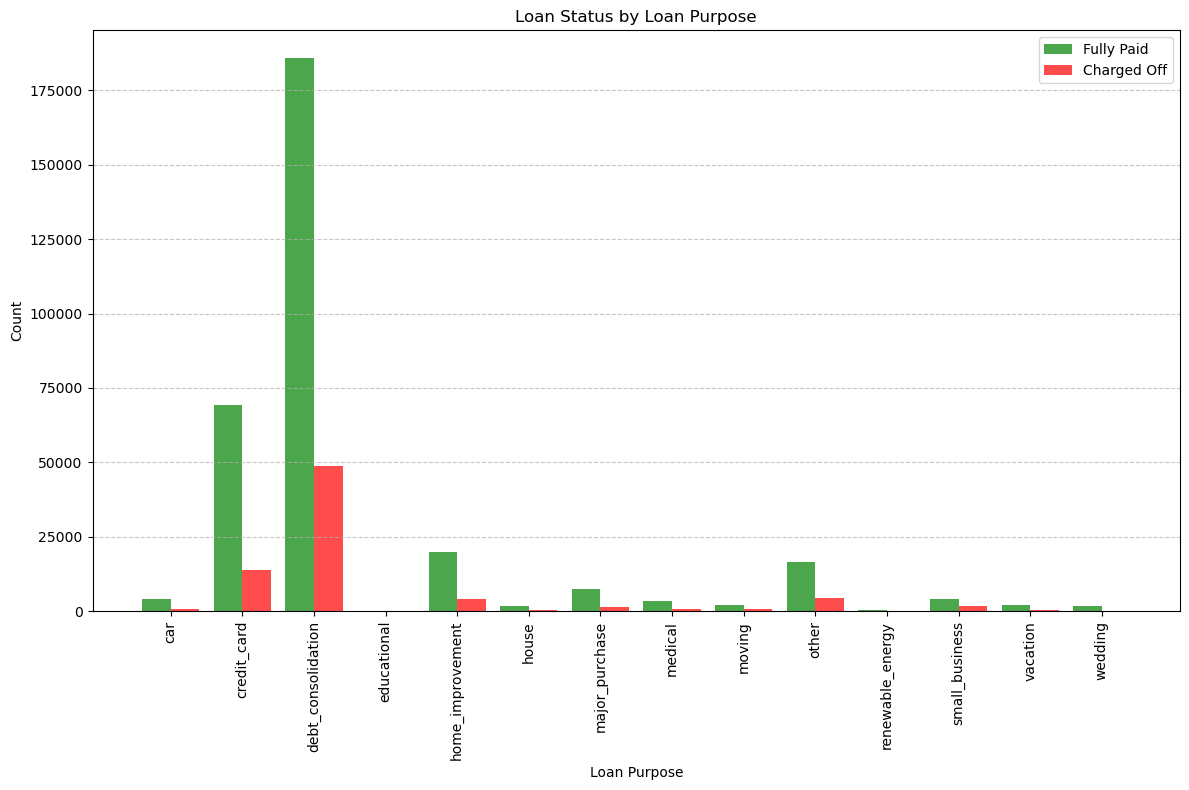

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Filter the DataFrame for 'Fully Paid' and 'Charged Off' loan statuses for purpose
fully_paid_loan_purpose = loan_df.loc[loan_df['loan_status'] == 'Fully Paid', 'purpose'].value_counts()
charged_off_loan_purpose = loan_df.loc[loan_df['loan_status'] == 'Charged Off', 'purpose'].value_counts()

# Create a DataFrame with both counts
loan_purpose_df = pd.DataFrame({
    'Fully Paid': fully_paid_loan_purpose,
    'Charged Off': charged_off_loan_purpose
}).fillna(0)  # Fill NaN values with 0

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Set up for bar plot
bar_width = 0.4
index = np.arange(len(loan_purpose_df))

# Bar plots for loan purpose by loan status
ax.bar(index - bar_width / 2, loan_purpose_df['Fully Paid'], bar_width, label='Fully Paid', color='green', alpha=0.7)
ax.bar(index + bar_width / 2, loan_purpose_df['Charged Off'], bar_width, label='Charged Off', color='red', alpha=0.7)

# Customize the plot
ax.set_title("Loan Status by Loan Purpose")
ax.set_xlabel("Loan Purpose")
ax.set_ylabel("Count")
ax.set_xticks(index)
ax.set_xticklabels(loan_purpose_df.index, rotation=90)
ax.legend(loc='upper right')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show plot
plt.tight_layout()
plt.show()




In [45]:
# # Normalize the 'title' column to handle case sensitivity and minor differences
# loan_df['title'] = loan_df['title'].replace({
#     'debt consolidation': 'debt consolidation',
#     'consolidation': 'debt consolidation',
#     'debt consolidation loan': 'debt consolidation',
#     'credit card refinancing': 'credit card refinancing',
#     'home improvement': 'home improvement',
#     'other': 'other',
#     'major purchase': 'major purchase',
#     'business': 'business',
#     'debt Consolidation': 'debt consolidation',
#     'Credit Card Refinancing': 'credit card refinancing',
#     'Home Improvement': 'home improvement',
#     'Other': 'other',
#     'Major Purchase': 'major purchase',
#     'Business': 'business'
# })

# loan_df['title'] = loan_df['title'].str.lower().str.strip()

# # Filter the DataFrame for 'Fully Paid' and 'Charged Off' loan statuses for title
# fully_paid_loan_title = loan_df.loc[loan_df['loan_status'] == 'Fully Paid', 'title'].value_counts()
# charged_off_loan_title = loan_df.loc[loan_df['loan_status'] == 'Charged Off', 'title'].value_counts()

# # Create a DataFrame with both counts
# loan_title_df = pd.DataFrame({
#     'Fully Paid': fully_paid_loan_title,
#     'Charged Off': charged_off_loan_title,
# }).fillna(0)  # Fill NaN values with 0

# # Plotting
# fig, ax = plt.subplots(figsize=(12, 8))

# # Set up for bar plot
# bar_width = 0.4
# index = np.arange(len(loan_title_df))

# # Bar plots for loan title by loan status
# ax.bar(index - bar_width / 2, loan_title_df['Fully Paid'], bar_width, label='Fully Paid', color='green', alpha=0.7)
# ax.bar(index + bar_width / 2, loan_title_df['Charged Off'], bar_width, label='Charged Off', color='red', alpha=0.7)

# # Customize the plot
# ax.set_title("Loan Status by Loan Title")
# ax.set_xlabel("Loan Title")
# ax.set_ylabel("Count")
# ax.set_xticks(index)
# ax.set_xticklabels(loan_title_df.index, rotation=90)
# ax.legend(loc='upper right')
# ax.grid(axis='y', linestyle='--', alpha=0.7)

# # Adjust layout and show plot
# plt.tight_layout()
# plt.show()


In [46]:
loan_df.columns


Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

C:\Users\enmwa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\enmwa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\enmwa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\enmwa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

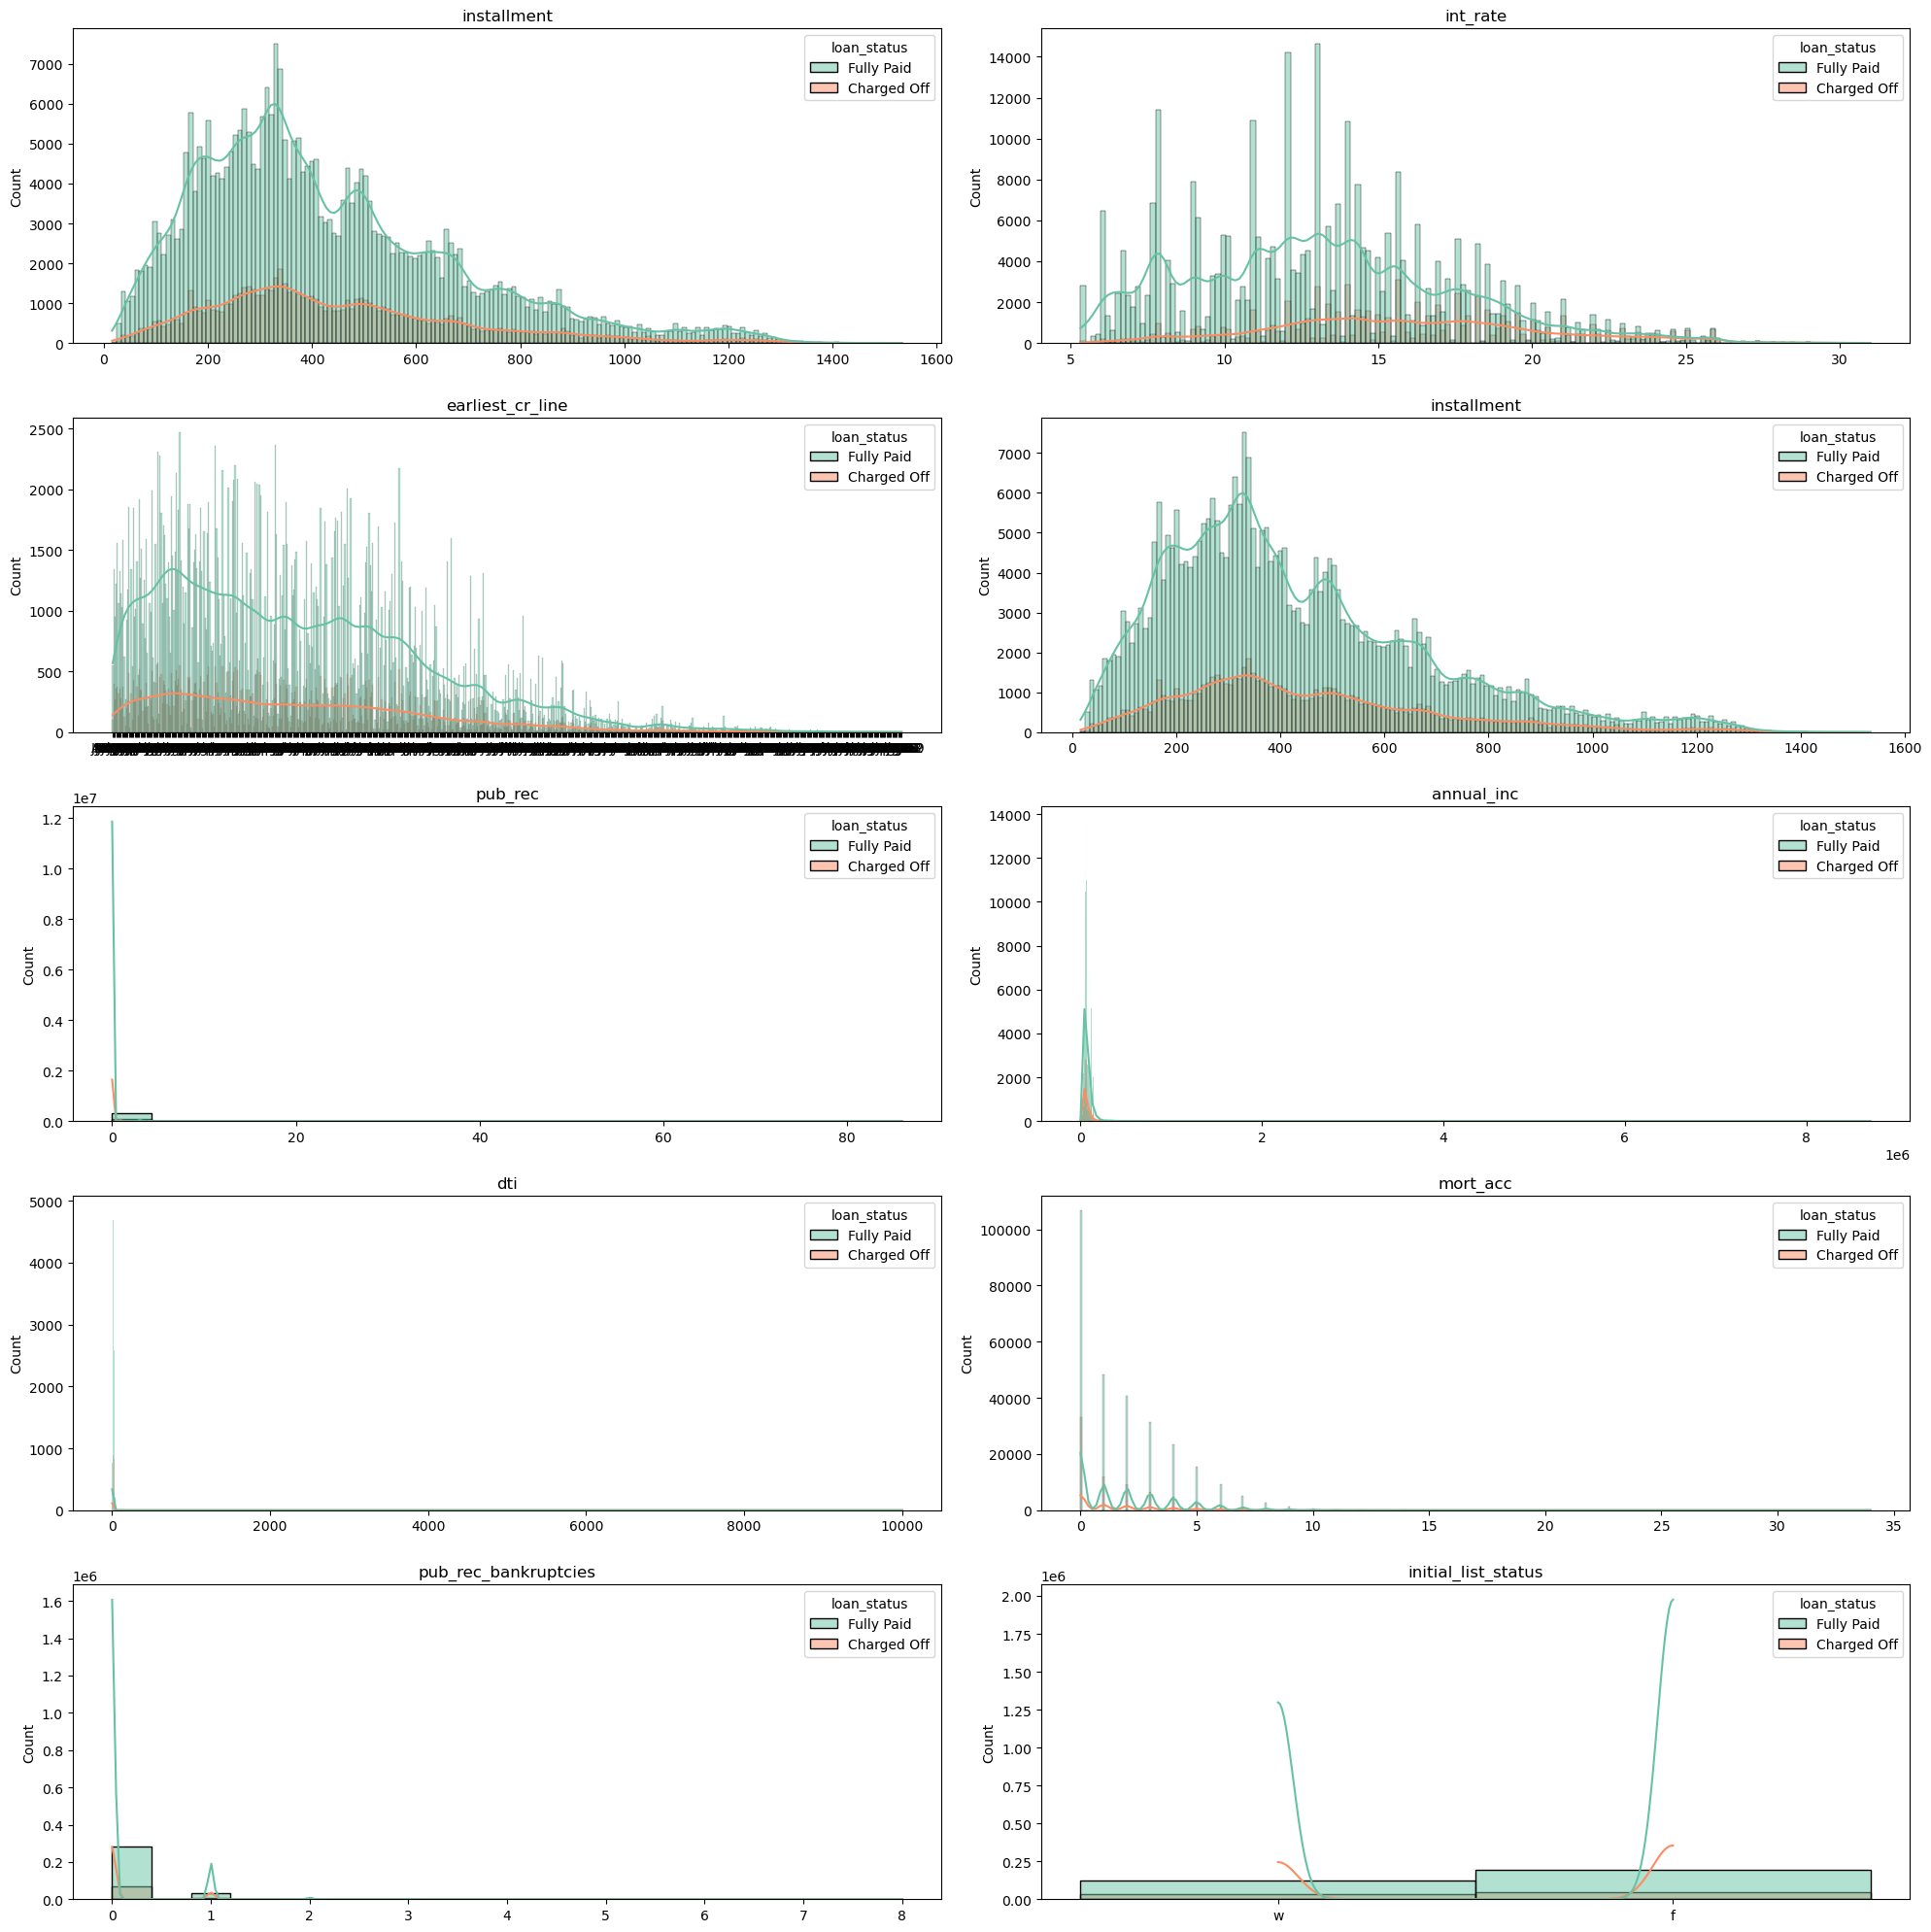

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, axes = plt.subplots(5,2, figsize=(20, 20))

# List of numerical features to plot
numerical_features = ['installment','int_rate','earliest_cr_line', 'installment', 'pub_rec', 'annual_inc', 'dti', 'mort_acc', 'pub_rec_bankruptcies', 'initial_list_status']

# Loop through each feature and plot the histogram with KDE, colored by loan status
for i, ax in enumerate(axes.flatten()):
    sns.histplot(data=loan_df, x=numerical_features[i], hue='loan_status', kde=True, ax=ax, palette='Set2')  # Use hue for loan status
    ax.set_title(numerical_features[i])
    ax.set_xlabel('')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


In [ ]:
#loan_df.column(address)

In [48]:

#loan_df['address'] = loan_df['address'].str.strip()
# Extract the last 5 characters of the 'address' as the zip code
loan_df['zip_code'] = loan_df['address'].apply(lambda x: x[-5:])

# Create a corrected address column, assuming 'address' column includes both address and zip code
# The zip code is the last 5 characters and removes it from the address
loan_df['correct_address'] = loan_df['address'].apply(lambda x: x[:-5].strip())

# Display the value counts for zip codes
print(loan_df['zip_code'].value_counts())
print(loan_df['correct_address'].value_counts())
import pandas as pd

# Sample DataFrame creation (Replace this with your actual DataFrame)
# loan_df = pd.read_csv('path.csv')

# Extract zip code (last 5 characters)
loan_df['zip_code'] = loan_df['address'].str[-5:]

# Extract corrected address (everything except the last 5 characters)
loan_df['correct_address'] = loan_df['address'].str[:-5].str.strip()

# Drop the 'address' column
#loan_df = loan_df.drop(columns=['address'])

# Check the DataFrame to verify changes
print(loan_df.head())



zip_code
70466    56985
30723    56546
22690    56527
48052    55917
00813    45824
29597    45471
05113    45402
11650    11226
93700    11151
86630    10981
Name: count, dtype: int64
correct_address
USCGC Smith\r\nFPO AE                                 34
USS Smith\r\nFPO AP                                   33
USNS Smith\r\nFPO AE                                  26
USNV Johnson\r\nFPO AP                                26
USNS Smith\r\nFPO AP                                  25
                                                      ..
USCGC Acosta\r\nFPO AE                                 1
462 James Spurs\r\nWest Alexis, WY                     1
521 James Walks\r\nSouth Nathan, DE                    1
594 Cunningham Motorway Apt. 566\r\nJonesburgh, WA     1
787 Michelle Causeway\r\nBriannaton, AR                1
Name: count, Length: 388451, dtype: int64
   loan_amnt       term  int_rate  installment grade sub_grade  \
0      10000  36 months     11.44       329.48     B        B4  

In [ ]:
# loan_df2=loan_df.drop('address', axis=1, inplace=True)
# loan_df2.columns

In [ ]:
# import folium
# from geopy.geocoders import Nominatim

# # Initialize geolocator
# geolocator = Nominatim(user_agent="geoapiExercises")

# # Create a map centered around the US
# map_correct_address = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# # Function to geocode addresses
# def geocode_address(address):
#     try:
#         location = geolocator.geocode(address)
#         return location.latitude, location.longitude
#     except:
#         return None, None


# # Add markers to the map for each address
# for idx, row in loan_df.iterrows():
#     address = row['correct_address']
#     lat, lon = geocode_address(address)
#     if lat and lon:
#         folium.Marker(location=[lat, lon], popup=row['zipcode']).add_to(map_correct_address)

# # Save the map to an HTML file
# map_correct_address.save('map_correct_address.html')


In [49]:
import time
import folium
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import time

# Initialize geolocator
geolocator = Nominatim(user_agent="geoapiExercises")

def geocode_address(address):
    try:
        location = geolocator.geocode(address)
        time.sleep(1)  # Adding a delay to respect rate limits
        return location.latitude, location.longitude
    except:
        print(f"Error geocoding {address}")
        return None, None


In [50]:
geocode_cache = {}

def geocode_address(address):
    if address in geocode_cache:
        return geocode_cache[address]
    
    try:
        location = geolocator.geocode(address)
        time.sleep(1)  # Adding a delay to respect rate limits
        lat_lon = (location.latitude, location.longitude) if location else (None, None)
        geocode_cache[address] = lat_lon
        return lat_lon
    except:
        print(f"Error geocoding {address}")
        return None, None


In [ ]:
# Continue with the map creation process
for idx, row in loan_df.iterrows():
    address = row['correct_address']
    lat, lon = geocode_address(address)
    if lat and lon:
        folium.CircleMarker(
            location=[lat, lon],
            radius=5,
            popup=row['loan_status'],
            color='green' if row['loan_status'] == 'Fully Paid' else 'red',
            fill=True,
            fill_color='green' if row['loan_status'] == 'Fully Paid' else 'red'
        ).add_to(map_loan_status)
    else:
        print(f"Failed to geocode: {address}")

map_loan_status.save('map_loan_status.html')


Error geocoding 0174 Michelle Gateway
Mendozaberg, OK
Failed to geocode: 0174 Michelle Gateway
Mendozaberg, OK
Error geocoding 1076 Carney Fort Apt. 347
Loganmouth, SD
Failed to geocode: 1076 Carney Fort Apt. 347
Loganmouth, SD
Error geocoding 87025 Mark Dale Apt. 269
New Sabrina, WV
Failed to geocode: 87025 Mark Dale Apt. 269
New Sabrina, WV
Error geocoding 823 Reid Ford
Delacruzside, MA
Failed to geocode: 823 Reid Ford
Delacruzside, MA
Error geocoding 679 Luna Roads
Greggshire, VA
Failed to geocode: 679 Luna Roads
Greggshire, VA
Error geocoding 1726 Cooper Passage Suite 129
North Deniseberg, DE
Failed to geocode: 1726 Cooper Passage Suite 129
North Deniseberg, DE
Error geocoding 1008 Erika Vista Suite 748
East Stephanie, TX
Failed to geocode: 1008 Erika Vista Suite 748
East Stephanie, TX
Error geocoding USCGC Nunez
FPO AE
Failed to geocode: USCGC Nunez
FPO AE
Error geocoding USCGC Tran
FPO AP
Failed to geocode: USCGC Tran
FPO AP
Error geocoding 3390 Luis Rue
Mauricestad, VA
Failed to

In [ ]:
from retrying import retry

@retry(stop_max_attempt_number=3, wait_fixed=2000)
def geocode_address(address):
    try:
        
        location = geolocator.geocode(address)
        time.sleep(1)
        return location.latitude, location.longitude if location else (None, None)
    except:
        raise  # Retry the operation


In [ ]:
# import folium
# from geopy.geocoders import Nominatim
# from geopy.exc import GeocoderTimedOut
# import time

# # Initialize geolocator
# geolocator = Nominatim(user_agent="geoapiExercises")

# # Create a map centered around the US
# map_correct_address = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# # Function to geocode addresses with retry logic
# def geocode_address(address):
#     try:
#         location = geolocator.geocode(address, timeout=10)
#         if location:
#             return location.latitude, location.longitude
#     except GeocoderTimedOut:
#         time.sleep(1)  # Wait before retrying
#         return geocode_address(address)  # Retry
#     except Exception as e:
#         print(f"Error geocoding {address}: {e}")
        
#         return None, None
#     return None, None

# # Add markers to the map for each address
# for idx, row in loan_df.iterrows():
#     address = row['correct_address']
#     lat, lon = geocode_address(address)
#     if lat and lon:
#         folium.Marker(location=[lat, lon], popup=row['zipcode']).add_to(map_correct_address)

# # Save the map to an HTML file
# map_correct_address.save('map_correct_address.html')


In [ ]:
# map_emp_title = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# # Example: Just randomly place them in the US for demonstration (replace with actual logic)
# for title in loan_df['emp_title'].unique():
#     folium.Marker(location=[random.uniform(25, 50), random.uniform(-125, -70)], 
#                   popup=title).add_to(map_emp_title)

# map_emp_title.save('map_emp_title.html')

import folium
import random

# Create a map centered around the US
map_emp_title = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Loop through each unique employee title and place a marker on the map
for title in loan_df['emp_title'].unique():
    # Randomly generate latitude and longitude within the U.S.
    lat = random.uniform(25, 50)   # Latitude range for the U.S.
    lon = random.uniform(-125, -70)  # Longitude range for the U.S.
    
    # Add a marker to the map
    folium.Marker(location=[lat, lon], popup=title).add_to(map_emp_title)

# Save the map to an HTML file
map_emp_title.save('map_emp_title.html')


In [ ]:
# map_loan_status = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# for idx, row in loan_df.iterrows():
#     lat, lon = geocode_address(row['correct_address'])
#     if lat and lon:
#         folium.CircleMarker(
#             location=[lat, lon],
#             radius=5,
#             popup=row['loan_status'],
#             color='green' if row['loan_status'] == 'Fully Paid' else 'red',
#             fill=True,
#             fill_color='green' if row['loan_status'] == 'Fully Paid' else 'red'
#         ).add_to(map_loan_status)

# map_loan_status.save('map_loan_status.html')

import folium

# Initialize the map centered on the U.S.
map_loan_status = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Loop through each row and add a marker for each loan status
for idx, row in loan_df.iterrows():
    lat, lon = geocode_address(row['correct_address'])  # Assume this function is defined elsewhere
    if lat and lon:
        folium.CircleMarker(
            location=[lat, lon],
            radius=5,
            popup=row['loan_status'],
            color='green' if row['loan_status'] == 'Fully Paid' else 'red',
            fill=True,
            fill_color='green' if row['loan_status'] == 'Fully Paid' else 'red'
        ).add_to(map_loan_status)

# Save the map to an HTML file
map_loan_status.save('map_loan_status.html')


In [ ]:
# import pandas as pd

# # Assuming loan_df is a dictionary, convert it to a DataFrame
# loan_df = pd.DataFrame(loan_df)

# # Assuming 'Fully Paid' is positive and 'Charged Off' is negative
# w_p = loan_df.loan_status.value_counts().get('Fully Paid', 1) / loan_df.shape[0]
# w_n = loan_df.loan_status.value_counts().get('Charged Off', 0) / loan_df.shape[0]

# print(f"Weight of positive values: {w_p:.4f}")
# print(f"Weight of negative values: {w_n:.4f}")


# Print the column names to check if 'loan_status' exists
print(loan_df.columns)

# If the column name is different, replace 'loan_status' with the correct column name
# For example, if the correct name is 'Loan_Status' (case sensitivity matters)
if 'Loan_Status' in loan_df.columns:
    w_p = loan_df['Loan_Status'].value_counts().get('Fully Paid', 1) / loan_df.shape[0]
    w_n = loan_df['Loan_Status'].value_counts().get('Charged Off', 0) / loan_df.shape[0]

    print(f"Weight of positive values: {w_p:.4f}")
    print(f"Weight of negative values: {w_n:.4f}")
else:
    print("The 'loan_status' column does not exist in the DataFrame.")


In [ ]:
train, test = train_test_split(loan_df, test_size=0.33, random_state=42)

print(train.shape)
print(test.shape)

In [ ]:
print(train.shape)
train = train[train['annual_inc'] <= 250000]
train = train[train['dti'] <= 50]
train = train[train['open_acc'] <= 40]
train = train[train['total_acc'] <= 80]
train = train[train['revol_util'] <= 120]
train = train[train['revol_bal'] <= 250000]
print(train.shape)

In [ ]:
X_train, y_train = train.drop('loan_status', axis=1), train.loan_status
X_test, y_test = test.drop('loan_status', axis=1), test.loan_status

In [ ]:
X_train.dtypes

In [ ]:
# Inspect unique values in 'term' column
print(X_train_df['term'].unique())


In [ ]:
# # X_train['term'] = X_train['term'].str.replace(' months', '').astype(int)
# # X_test['term'] = X_test['term'].str.replace(' months', '').astype(int)
# import pandas as pd

# # Example column names - replace with your actual column names
# columns = ['term', 'column2', 'column3', 'column4', 'column5', 
#            'column6', 'column7', 'column8', 'column9', 
#            'column10', 'column11', 'column12', 'column13']

# # Convert numpy arrays back to DataFrame
# X_train_df = pd.DataFrame(X_train, columns=columns)
# X_test_df = pd.DataFrame(X_test, columns=columns)

# # Ensure 'term' is treated as a string
# X_train_df['term'] = X_train_df['term'].astype(str)
# X_test_df['term'] = X_test_df['term'].astype(str)

# # Now you can use the .str accessor
# X_train_df['term'] = X_train_df['term'].str.replace(' months', '').astype(int)
# X_test_df['term'] = X_test_df['term'].str.replace(' months', '').astype(int)

# # Convert back to numpy arrays if needed
# X_train = X_train_df.values
# X_test = X_test_df.values


In [ ]:
# Convert to string
X_train_df['term'] = X_train_df['term'].astype(str)

# Remove 'months' if present
X_train_df['term'] = X_train_df['term'].str.replace(' months', '')

# Convert to integer
X_train_df['term'] = pd.to_numeric(X_train_df['term'], errors='coerce').fillna(0).astype(int)


In [ ]:
# Convert to string and handle floats
X_train_df['term'] = X_train_df['term'].astype(str).str.replace(' months', '')

# Convert to numeric, coercing errors
X_train_df['term'] = pd.to_numeric(X_train_df['term'], errors='coerce')

# If necessary, convert to integers (use fillna to handle NaNs if needed)
X_train_df['term'] = X_train_df['term'].fillna(0).astype(int)


In [ ]:
# Convert to string and handle floats
X_train_df['term'] = X_train_df['term'].astype(str).str.replace(' months', '')

# Convert to numeric, coercing errors
X_train_df['term'] = pd.to_numeric(X_train_df['term'], errors='coerce')

# If necessary, convert to integers (use fillna to handle NaNs if needed)
X_train_df['term'] = X_train_df['term'].fillna(0).astype(int)


In [ ]:
X_train = X_train_df.values
X_test = X_test_df.values


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Drop non-numeric columns if not needed
# X_train = X_train.select_dtypes(include=[np.number])
# X_test = X_test.select_dtypes(include=[np.number])

# # Apply scaling
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# Ensure X_train and X_test are DataFrames
# X_train_df = pd.DataFrame(X_train, columns=['list_of_columns'])
# X_test_df = pd.DataFrame(X_test, columns=['list_of_columns'])
# # Drop non-numeric columns if not needed
# X_train_df = X_train_df.select_dtypes(include=[np.number])
# X_test_df = X_test_df.select_dtypes(include=[np.number])
# Check the shape of X_train and X_test
print(X_train.shape)
print(X_test.shape)



In [ ]:
# Example: Create DataFrames with correct column names
# Replace ['col1', 'col2', ..., 'col13'] with actual column names if known
X_train_df = pd.DataFrame(X_train, columns=[f'feature_{i}' for i in range(X_train.shape[1])])
X_test_df = pd.DataFrame(X_test, columns=[f'feature_{i}' for i in range(X_test.shape[1])])


In [ ]:
# Convert DataFrames to numpy arrays
X_train = X_train_df.values
X_test = X_test_df.values

# Apply scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
X_test_df.columns

In [ ]:
X_train_df.columns

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Assuming X_train and X_test are numpy arrays; check their shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# Define column names according to the number of features in your data
num_features_train = X_train.shape[1]
num_features_test = X_test.shape[1]

# Update the column names list based on the actual number of features
column_names = [f'feature_{i}' for i in range(num_features_train)]

# Create DataFrames with the correct number of columns
X_train_df = pd.DataFrame(X_train, columns=column_names)
X_test_df = pd.DataFrame(X_test, columns=column_names)

# Drop non-numeric columns if needed (not necessary here as all columns are numeric)
# X_train_df = X_train_df.select_dtypes(include=[np.number])
# X_test_df = X_test_df.select_dtypes(include=[np.number])

# Convert DataFrames back to numpy arrays
X_train = X_train_df.values
X_test = X_test_df.values

# Apply scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Now you can convert them to numpy arrays
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder with the correct parameter name
onehot_encoder = OneHotEncoder(sparse_output=False)

# Reshape is necessary if your target is a single column
y_train = onehot_encoder.fit_transform(y_train.reshape(-1, 1))
y_test = onehot_encoder.transform(y_test.reshape(-1, 1))

# Convert to float32 if needed
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)


In [ ]:
import pandas as pd
import numpy as np

# # Ensure y_train and y_test are pandas Series
# if isinstance(y_train, np.ndarray):
#     y_train = pd.Series(y_train)

# if isinstance(y_test, np.ndarray):
#     y_test = pd.Series(y_test)

# # Apply the mapping
# y_train = y_train.map({'Fully Paid': 0, 'Charged Off': 1})
# y_test = y_test.map({'Fully Paid': 0, 'Charged Off': 1})

# # Convert to numpy arrays
# y_train = np.array(y_train).astype(np.float32)
# y_test = np.array(y_test).astype(np.float32)

y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)


In [ ]:
# Ensure y_train and y_test are pandas Series
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

# Apply the mapping
y_train = y_train.map({'Fully Paid': 0, 'Charged Off': 1})
y_test = y_test.map({'Fully Paid': 0, 'Charged Off': 1})

# Convert to numpy arrays
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)


In [ ]:
#ANN

In [ ]:
# def evaluate_nn(true, pred, train=True):
#     if train:
#         clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
#         print("Train Result:\n================================================")
#         print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
#         print("_______________________________________________")
#         print(f"CLASSIFICATION REPORT:\n{clf_report}")
#         print("_______________________________________________")
#         print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
#     elif train==False:
#         clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
#         print("Test Result:\n================================================")        
#         print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
#         print("_______________________________________________")
#         print(f"CLASSIFICATION REPORT:\n{clf_report}")
#         print("_______________________________________________")
#         print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
# def plot_learning_evolution(r):
#     plt.figure(figsize=(12, 8))
    
#     plt.subplot(2, 2, 1)
#     plt.plot(r.history['loss'], label='Loss')
#     plt.plot(r.history['val_loss'], label='val_Loss')
#     plt.title('Loss evolution during trainig')
#     plt.legend()

#     plt.subplot(2, 2, 2)
#     plt.plot(r.history['AUC'], label='AUC')
#     plt.plot(r.history['val_AUC'], label='val_AUC')
#     plt.title('AUC score evolution during trainig')
#     plt.legend();

# def nn_model(num_columns, num_labels, hidden_units, dropout_rates, learning_rate):
#     inp = tf.keras.layers.Input(shape=(num_columns, ))
#     x = BatchNormalization()(inp)
#     x = Dropout(dropout_rates[0])(x)
#     for i in range(len(hidden_units)):
#         x = Dense(hidden_units[i], activation='relu')(x)
#         x = BatchNormalization()(x)
#         x = Dropout(dropout_rates[i + 1])(x)
#     x = Dense(num_labels, activation='sigmoid')(x)
  
#     model = Model(inputs=inp, outputs=x)
#     model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=[AUC(name='AUC')])
#     return model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

# Function to evaluate NN model
def evaluate_nn(true, pred, is_training=True):
    clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True)).transpose()
    accuracy = accuracy_score(true, pred) * 100
    conf_matrix = confusion_matrix(true, pred)
    
    if is_training:
        print("Train Result:\n================================================")
    else:
        print("Test Result:\n================================================")
        
    print(f"Accuracy Score: {accuracy:.2f}%")
    print("_______________________________________________")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print("_______________________________________________")
    print(f"Confusion Matrix:\n{conf_matrix}\n")

# Function to plot learning evolution
def plot_learning_evolution(r):
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(r.history['loss'], label='Loss')
    plt.plot(r.history['val_loss'], label='Val Loss')
    plt.title('Loss Evolution During Training')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(r.history.get('auc', []), label='AUC')
    plt.plot(r.history.get('val_auc', []), label='Val AUC')
    plt.title('AUC Score Evolution During Training')
    plt.xlabel('Epoch')
    plt.ylabel('AUC')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Function to create NN model
def nn_model(num_columns, num_labels, hidden_units, dropout_rates, learning_rate):
    inp = Input(shape=(num_columns,))
    x = BatchNormalization()(inp)
    x = Dropout(dropout_rates[0])(x)
    
    for i in range(len(hidden_units)):
        x = Dense(hidden_units[i], activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(dropout_rates[i + 1])(x)
    
    x = Dense(num_labels, activation='sigmoid')(x)
  
    model = Model(inputs=inp, outputs=x)
    model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=[AUC(name='AUC')])
    return model


In [ ]:
print(np.isnan(X_train).any(), np.isinf(X_train).any())
print(np.isnan(X_test).any(), np.isinf(X_test).any())
print(np.isnan(y_train).any(), np.isinf(y_train).any())
print(np.isnan(y_test).any(), np.isinf(y_test).any())


In [ ]:
print(np.min(X_train), np.max(X_train))
print(np.min(X_test), np.max(X_test))


In [ ]:
def simple_nn_model(num_columns, num_labels, learning_rate):
    inp = Input(shape=(num_columns,))
    x = Dense(64, activation='relu')(inp)
    x = Dense(num_labels, activation='sigmoid')(x)
    
    model = Model(inputs=inp, outputs=x)
    model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=[AUC(name='AUC')])
    return model

model = simple_nn_model(num_columns=num_columns, num_labels=num_labels, learning_rate=learning_rate)


In [ ]:
print(pd.Series(y_train.flatten()).value_counts())
print(pd.Series(y_test.flatten()).value_counts())


In [ ]:
model.summary()

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
from tensorflow.keras.models import Model

def simple_nn_model(num_columns, num_labels, learning_rate):
    inp = Input(shape=(num_columns,))
    x = Dense(64, activation='relu')(inp)
    x = Dense(num_labels, activation='sigmoid')(x)
    
    model = Model(inputs=inp, outputs=x)
    model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=[AUC(name='AUC')])
    return model

model = simple_nn_model(num_columns=num_columns, num_labels=num_labels, learning_rate=1e-4)

r = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)


In [ ]:
# num_columns = X_train.shape[1]
# num_labels = 1
# hidden_units = [150, 150, 150]
# dropout_rates = [0.1, 0, 0.1, 0]
# learning_rate = 1e-3


# model = nn_model(
#     num_columns=num_columns, 
#     num_labels=num_labels,
#     hidden_units=hidden_units,
#     dropout_rates=dropout_rates,
#     learning_rate=learning_rate
# )
# r = model.fit(
#     X_train, y_train,
#     validation_data=(X_test, y_test),
#     epochs=20,
#     batch_size=32
# )

# import tensorflow as tf
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.metrics import AUC
# from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# import pandas as pd
# import matplotlib.pyplot as plt

# # Define your NN model
# def nn_model(num_columns, num_labels, hidden_units, dropout_rates, learning_rate):
#     inp = Input(shape=(num_columns,))
#     x = BatchNormalization()(inp)
#     x = Dropout(dropout_rates[0])(x)
    
#     for i in range(len(hidden_units)):
#         x = Dense(hidden_units[i], activation='relu')(x)
#         x = BatchNormalization()(x)
#         x = Dropout(dropout_rates[i + 1])(x)
    
#     x = Dense(num_labels, activation='sigmoid')(x)
  
#     model = Model(inputs=inp, outputs=x)
#     model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=[AUC(name='AUC')])
#     return model

# # Create the model
# num_columns = X_train.shape[1]
# num_labels = 1
# hidden_units = [150, 150, 150]
# dropout_rates = [0.1, 0, 0.1, 0]
# learning_rate = 1e-3

# model = nn_model(
#     num_columns=num_columns, 
#     num_labels=num_labels,
#     hidden_units=hidden_units,
#     dropout_rates=dropout_rates,
#     learning_rate=learning_rate
# )

# # Train the model
# r = model.fit(
#     X_train, y_train,
#     validation_data=(X_test, y_test),
#     epochs=20,
#     batch_size=32
# )

# # Plot the learning curves
# plot_learning_evolution(r)

# # Evaluate the model on test data
# y_pred = (model.predict(X_test) > 0.5).astype(int)
# evaluate_nn(y_test, y_pred, is_training=False)


In [ ]:
import matplotlib.pyplot as plt

def plot_learning_evolution(r, metric_name='Metric', title='Learning Evolution'):
    """
    Plots the learning evolution of a metric over epochs.

    Parameters:
        r (list or array): The list or array of metric values over time (e.g., accuracy, loss).
        metric_name (str): The name of the metric being plotted (default: 'Metric').
        title (str): The title of the plot (default: 'Learning Evolution').
    """
    
    epochs = range(1, len(r) + 1)

    plt.figure(figsize=(10, 6))
    plt.plot(epochs, r, 'b-', marker='o', label=metric_name)
    
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel(metric_name)
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage
r = [0.1, 0.2, 0.35, 0.45, 0.6, 0.7, 0.75, 0.8]  # Replace this with your data
plot_learning_evolution(r, metric_name='Accuracy', title='Learning Evolution of Accuracy')


In [ ]:
y_train_pred = model.predict(X_train)
evaluate_nn(y_train, y_train_pred.round(), train=True)

In [ ]:
y_test_pred = model.predict(X_test)
evaluate_nn(y_test, y_test_pred.round(), train=False)

In [ ]:
scores_dict = {
    'ANNs': {
        'Train': roc_auc_score(y_train, model.predict(X_train)),
        'Test': roc_auc_score(y_test, model.predict(X_test)),
    },
}

In [ ]:
 XGBoost Classifier

In [ ]:
# param_grid = dict(
#     n_estimators=stats.randint(10, 500),
#     max_depth=stats.randint(1, 10),
#     learning_rate=stats.uniform(0, 1)
# )

xgb_clf = XGBClassifier(use_label_encoder=False)
# xgb_cv = RandomizedSearchCV(
#     xgb_clf, param_grid, cv=3, n_iter=60, 
#     scoring='roc_auc', n_jobs=-1, verbose=1
# )
# xgb_cv.fit(X_train, y_train)

# best_params = xgb_cv.best_params_
# best_params['tree_method'] = 'gpu_hist'
# # best_params = {'n_estimators': 50, 'tree_method': 'gpu_hist'}
# print(f"Best Parameters: {best_params}")

# xgb_clf = XGBClassifier(**best_params)
xgb_clf.fit(X_train, y_train)

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(
    xgb_clf, X_test, y_test, 
    cmap='Blues', values_format='d', 
    display_labels=['Default', 'Fully-Paid']
)

disp = RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test)

In [ ]:
scores_dict['XGBoost'] = {
        'Train': roc_auc_score(y_train, xgb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, xgb_clf.predict(X_test)),
    }

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# The number of features in the input layer should match the number of input variables
input_dim = X_train.shape[1]

# Initializing the constructor for the Sequential model
model = Sequential()

# Adding an input layer with a hidden layer of 10 neurons and using 'relu' activation function
model.add(Dense(10, activation='relu', input_shape=(input_dim,)))

# Adding a second hidden layer (optional, can be removed for simplicity)
model.add(Dense(5, activation='relu'))

# Adding the output layer with 'sigmoid' activation function for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with the Adam optimizer and binary crossentropy as the loss function
model.compile(loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy'])

In [ ]:
# param_grid = dict(
#     n_estimators=stats.randint(100, 1500),
#     max_depth=stats.randint(10, 100),
#     min_samples_split=stats.randint(1, 10),
#     min_samples_leaf=stats.randint(1, 10),
# )

rf_clf = RandomForestClassifier(n_estimators=100)
# rf_cv = RandomizedSearchCV(
#     rf_clf, param_grid, cv=3, n_iter=60, 
#     scoring='roc_auc', n_jobs=-1, verbose=1
# )
# rf_cv.fit(X_train, y_train)
# best_params = rf_cv.best_params_
# print(f"Best Parameters: {best_params}")
# rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(rf_clf, X_test, y_test, 
                             cmap='Blues', values_format='d', 
                             display_labels=['Default', 'Fully-Paid'])

disp = RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test)
RocCurveDisplay.from_estimator(rf_clf, X_test, y_test, ax=disp.ax_)

In [ ]:
# Training RandomForestClassifier
model_for_feature_selection = RandomForestClassifier(random_state=42)
model_for_feature_selection.fit(X_train, y_train)

# Extracting Feature Importances
feature_importances = model_for_feature_selection.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Displaying feature importances
feature_importance_df.sort_values(by='Importance', ascending=False)